In [189]:
import csv
import pandas as pd
from sklearn.cluster import SpectralClustering

In [84]:
df = pd.read_csv('data_clean.csv')
df

,Unnamed: 0,ID,Start_Time,Severity,Start_Lat,Start_Lng,Zipcode,Temperature(F),Humidity(%),Visibility(mi),...,Thunder and Hail,Thunder and Hail / Windy,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Tornado,Volcanic Ash,Widespread Dust,Wintry Mix,Wintry Mix / Windy
0,0,A-2716600,2016-02-08 00:37:08,3,40.10891,-83.09286,43017.0,42.1,58.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1,1,A-2716601,2016-02-08 05:56:20,2,39.86542,-84.06280,45424.0,36.9,91.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2,2,A-2716602,2016-02-08 06:15:39,2,39.10266,-84.52468,45203.0,36.0,97.0,10.0,...,0,0,0,0,0,0,0,0,0,0
3,3,A-2716603,2016-02-08 06:15:39,2,39.10148,-84.52341,45202.0,36.0,97.0,10.0,...,0,0,0,0,0,0,0,0,0,0
4,4,A-2716604,2016-02-08 06:51:45,2,41.06213,-81.53784,44311.0,39.0,55.0,10.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,1516059,A-4239402,2019-08-23 18:03:25,2,34.00248,-117.37936,92501.0,86.0,40.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1516060,1516060,A-4239403,2019-08-23 19:11:30,2,32.76696,-117.14806,92108.0,70.0,73.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1516061,1516061,A-4239404,2019-08-23 19:00:21,2,33.77545,-117.84779,92866.0,73.0,64.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1516062,1516062,A-4239405,2019-08-23 19:00:21,2,33.99246,-118.40302,90230.0,71.0,81.0,10.0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
df1 = df[df['Zipcode']<43400]
df1 = df1[df1['Zipcode']>43000]
dataTypeSeries = df.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
Unnamed: 0              int64
ID                     object
Start_Time             object
Severity                int64
Start_Lat             float64
                       ...   
Tornado                 int64
Volcanic Ash            int64
Widespread Dust         int64
Wintry Mix              int64
Wintry Mix / Windy      int64
Length: 140, dtype: object


In [113]:
lat = pd.DataFrame(df1['Start_Lat'])
long = pd.DataFrame(df1['Start_Lng'])
long

,Start_Lng
0,-83.092860
11,-82.968490
18,-82.846950
19,-82.856570
20,-82.994400
...,...
1503333,-83.073780
1504210,-83.003959
1504211,-83.003959
1504228,-83.003959


In [114]:
location = lat.join(long)
location

,Start_Lat,Start_Lng
0,40.108910,-83.092860
11,40.109310,-82.968490
18,39.972410,-82.846950
19,39.983800,-82.856570
20,40.026640,-82.994400
...,...,...
1503333,40.363801,-83.073780
1504210,39.861115,-83.003959
1504211,39.861115,-83.003959
1504228,39.861115,-83.003959


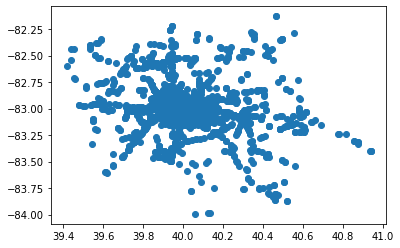

In [115]:
import matplotlib.pylab as plt
mydata = location[["Start_Lat", "Start_Lng"]].dropna(how="any")
vals = mydata.values
plt.scatter(vals[:, 0], vals[:, 1])

In [116]:
from sklearn.cluster import KMeans
import numpy as np


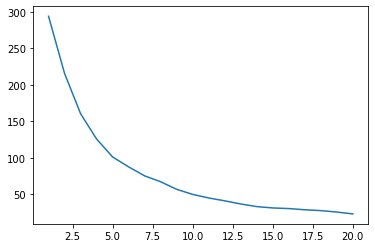

In [121]:
sse = []
kmeans_kwargs = {
   "init": "random",
   "n_init": 20,
   "max_iter": 300,
   "random_state": 42,
   }
for k in range(1, 21):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(mydata)
   sse.append(kmeans.inertia_)
plt.plot(range(1, 21), sse)
plt.show()

In [122]:
kmeans = KMeans(n_clusters=18, random_state=0).fit(mydata)
y_kmeans = kmeans.predict(mydata)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[ 5 11 12 ...  0  0  4]
[[ 39.86965574 -83.03748533]
 [ 40.05934582 -82.89196698]
 [ 40.6195655  -83.16267097]
 [ 40.31775007 -83.4133913 ]
 [ 39.93993264 -82.53155452]
 [ 40.11175185 -83.14044862]
 [ 39.66110381 -82.53617707]
 [ 40.32530393 -82.4212096 ]
 [ 39.95539684 -83.35276199]
 [ 39.61879264 -82.92463717]
 [ 39.98092681 -83.11819974]
 [ 40.10432941 -83.00008654]
 [ 39.92618861 -82.86448675]
 [ 39.73352591 -83.3080984 ]
 [ 40.32388904 -82.8652713 ]
 [ 40.34605179 -83.78393647]
 [ 40.30239369 -83.08701793]
 [ 39.97181385 -82.99402834]]


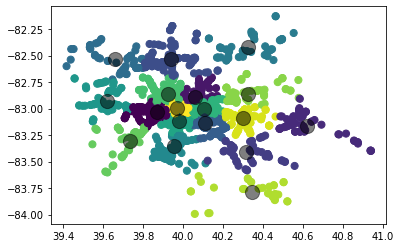

In [123]:
vals = mydata.values
plt.scatter(vals[:, 0], vals[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [170]:
#Atlanta Data
df2 = df[df['Zipcode']<=31196]
df2 = df2[df2['Zipcode']>=30301]
lat = pd.DataFrame(df2['Start_Lat'])
long = pd.DataFrame(df2['Start_Lng'])
location = lat.join(long)
location

,Start_Lat,Start_Lng
32596,33.741530,-84.414340
32618,33.912200,-84.383900
32633,33.927360,-84.357740
32642,33.741360,-84.414020
32654,32.563269,-83.719760
...,...,...
1515289,33.843640,-84.429720
1515713,33.686550,-84.499870
1515735,33.868000,-84.285130
1515739,33.920200,-84.320150


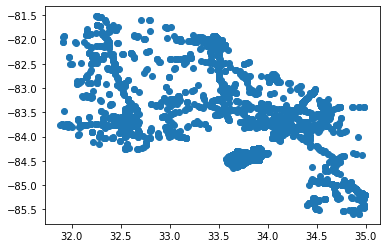

In [171]:
mydata = location[["Start_Lat", "Start_Lng"]].dropna(how="any")
vals = mydata.values
plt.scatter(vals[:, 0], vals[:, 1])

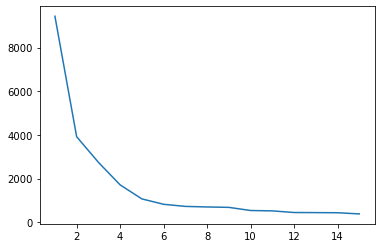

4

In [172]:
from kneed import DataGenerator, KneeLocator
sse = []
kmeans_kwargs = {
   "init": "random",
   "n_init": 15,
   "max_iter": 300,
   "random_state": 42,
   }
for k in range(1, 16):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(mydata)
   sse.append(kmeans.inertia_)
plt.plot(range(1, 16), sse)
plt.show()
kl = KneeLocator(
   range(1, 16), sse, curve="convex", direction="decreasing"
   )
kl.elbow

In [174]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(mydata)
y_kmeans = kmeans.predict(mydata)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[0 0 0 ... 0 0 0]
[[ 33.78423744 -84.39566844]
 [ 33.45773182 -82.21557533]
 [ 32.64033003 -83.68314615]
 [ 34.10512605 -83.59340162]
 [ 32.37233842 -82.29221373]
 [ 34.72298708 -85.01395223]]


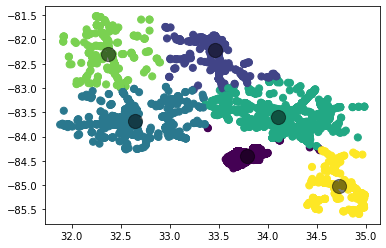

In [154]:
vals = mydata.values
plt.scatter(vals[:, 0], vals[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [167]:
#Atlanta 
df3 = df[df['Zipcode']<30309]
df3 = df3[df3['Zipcode']>30300]
lat = pd.DataFrame(df3['Start_Lat'])
long = pd.DataFrame(df3['Start_Lng'])
location = lat.join(long)
location

,Start_Lat,Start_Lng
33571,33.750420,-84.381720
33748,33.765620,-84.386050
33851,33.767740,-84.389010
39099,33.750420,-84.381720
39359,33.771870,-84.390410
...,...,...
1508977,33.769350,-84.390560
1510441,33.765570,-84.385450
1511019,33.758959,-84.379290
1511582,33.765345,-84.385641


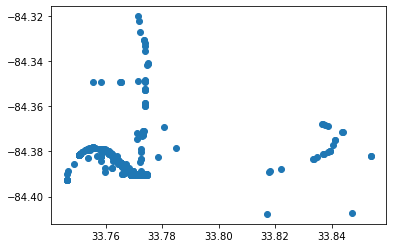

In [168]:
mydata = location[["Start_Lat", "Start_Lng"]].dropna(how="any")
vals = mydata.values
plt.scatter(vals[:, 0], vals[:, 1])

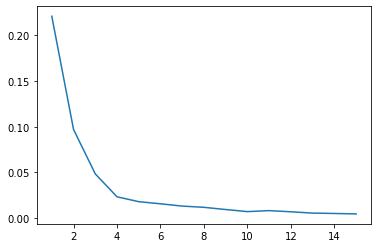

4

In [169]:
sse = []
kmeans_kwargs = {
   "init": "random",
   "n_init": 15,
   "max_iter": 300,
   "random_state": 42,
   }
for k in range(1, 16):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(mydata)
   sse.append(kmeans.inertia_)
plt.plot(range(1, 16), sse)
plt.show()
kl = KneeLocator(
   range(1, 16), sse, curve="convex", direction="decreasing"
   )
kl.elbow

In [163]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(mydata)
y_kmeans = kmeans.predict(mydata)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 0 0 1 0 0 0 0 1 1 3 3 3 1 0 3 3 0 1 2 0 1 1 1 0 1 1 2 0 2 0 0 0 0 0 0 1
 0 0 1 0 1 3 2 2 1 0 0 0 1 0 0 0 0 0 2 1 1 2 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 2 2 1 1 0 0 1 0 1 1 1 0 0 2 2 0 1 0 1 1 0 0 0 0
 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1
 0 1 0 1 0 0 0 2 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 3 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 2
 0 2 0 0 0 1 3 0 0 0 0 0 0 1 3 3 1 0 0 1 0 0 0 0 1 3 3 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 1 0 0 2 2 1 1 1 0 0 1 0 0 0 0 3 0 0 0 3 3 3 0 1 0 3
 3 0 0 0 1 0 0 0 0 1 3 3 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 3
 1 0 0 2 3 1 0 1 0 0 1 0 

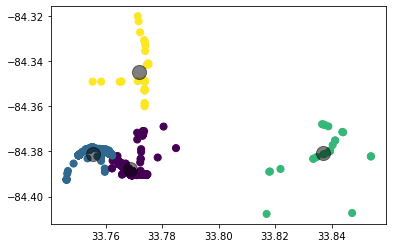

In [164]:
vals = mydata.values
plt.scatter(vals[:, 0], vals[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [190]:
#SC
df4 = df[df['Zipcode']<43400]
df4 = df4[df4['Zipcode']>43000]
lat = pd.DataFrame(df4['Start_Lat'])
long = pd.DataFrame(df4['Start_Lng'])
location = lat.join(long)
location

,Start_Lat,Start_Lng
0,40.108910,-83.092860
11,40.109310,-82.968490
18,39.972410,-82.846950
19,39.983800,-82.856570
20,40.026640,-82.994400
...,...,...
1503333,40.363801,-83.073780
1504210,39.861115,-83.003959
1504211,39.861115,-83.003959
1504228,39.861115,-83.003959


In [195]:
clustering = SpectralClustering(n_clusters=18,
    assign_labels='discretize',
    random_state=0).fit(location)
clustering.labels_
y_sc = clustering.fit_predict(location)

KeyboardInterrupt: 

In [ ]:
vals = location.values
plt.scatter(vals[:, 0], vals[:, 1], c=y_sc, s=50, cmap='viridis')